# 64130701719
Kanyawee Sadubjit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
rawData = pd.read_csv('titanic.csv', header=0)

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
rawData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data Preprocessing**

## **Missing value**

In [5]:
rawData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.coulmn: Age

In [6]:
# missing value coulmn's 'Age' is 19.87% (177) of count passenger
round((rawData['Age'].isnull().sum()/rawData.shape[0])*100,2)

19.87

Graph plot:distribution of column 'Age'

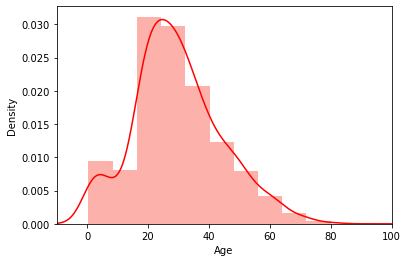

In [7]:
x = rawData["Age"].hist(bins=10, density=True, stacked=True, color='salmon', alpha=0.6)
rawData["Age"].plot(kind='density', color='red')
x.set(xlabel='Age')
plt.xlim(-10,100)
plt.show()

Filling the missing data with mean in column: Age 

In [8]:
rawData['Age'].mean()
rawData['Age']=rawData['Age'].fillna(rawData['Age'].mean())

### 2.coulmn: Embarked

In [9]:
# missing value coulmn's 'Embarked' is 0.22% (2) of count passenger
round((rawData['Embarked'].isnull().sum()/rawData.shape[0])*100,2)

0.22

In [10]:
rawData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The missing data will be replaced by the letter 'S' in the column, it have most popular in column.

In [11]:
rawData['Embarked'] = rawData['Embarked'].fillna('S')

### 3.coulmn: Cabin

In [12]:
# missing value coulmn's 'Cabin' is 77.10% (687) of count passenger
round((rawData['Cabin'].isnull().sum()/rawData.shape[0])*100,2)

77.1

Deleted: The 'cabin' column was removed due to a 77 % missing value.

In [13]:
rawData = rawData.drop(columns = 'Cabin')

In [14]:
# re-check missing value
rawData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**The number of female survived is more when compared to that of the male**

In [15]:
rawData['Survived'].value_counts(ascending=False)

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

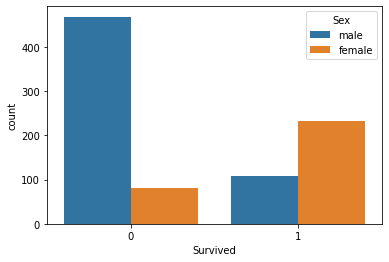

In [16]:
sns.countplot(x='Survived', hue='Sex', data=rawData)

**People around the age of 0-80 is spread more across the dataset**

The majority of the survivors were between the ages of 2 and 16. (minors)

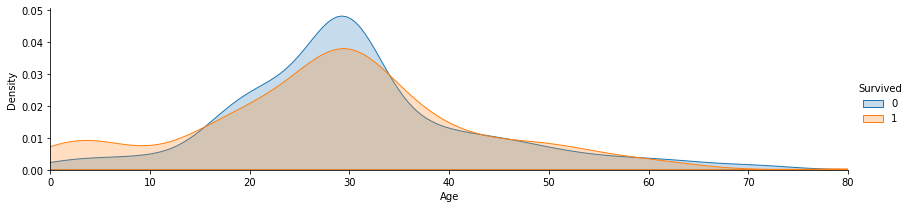

In [17]:
a = sns.FacetGrid(rawData, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , rawData['Age'].max()))
a.add_legend()

### **Historgram**



**The passengers in the first class have most survived  and The passengers in third class have most non-survived**

In [18]:
rawData['Pclass'].value_counts(ascending=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\Khunkan\opencv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


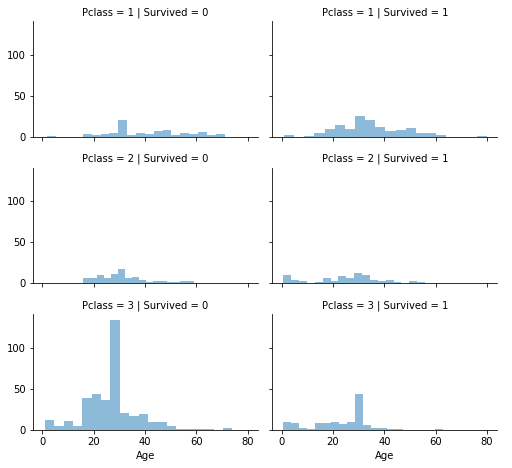

In [19]:
# sns.countplot(x='Survived', hue='Pclass', data=rawData)
grid = sns.FacetGrid(rawData, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Histogram comparison of sex, class, and age by survival**
* The bulk of those who survived are female first-class passengers.

* The bulk of those who non-survived are male third-class passengers.

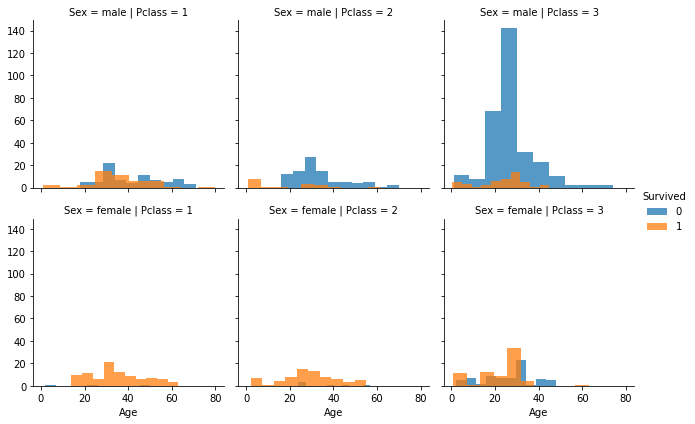

In [20]:
h = sns.FacetGrid(rawData, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

## **Convert categorical data**

Use One-Hot Encoding

In [21]:
df1 = rawData.copy()

### **Use numpy when for set categories**

**1. column: Sex**

In [22]:
#df1['Sex'] = np.where(df1['Sex'].str.contains('female'), 1, 0)
df1 = pd.get_dummies(df1, columns=['Sex'])
df1

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,0,1


**2. column: Pclass**

In [23]:
df1=pd.get_dummies(df1, columns=['Pclass'])


**3. column: Embarked**

In [24]:
df1=pd.get_dummies(df1, columns=['Embarked'])

In [25]:
# drop data is text column
df1.drop('Name', axis=1, inplace=True)
df1.drop('Ticket', axis=1, inplace=True)

In [26]:
# final data
train_data = df1
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [27]:
train_data.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028
std,257.353842,0.486592,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Correlation**

In [28]:
train_data.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,0.033207,-0.057527,-0.001652,0.012658,-0.042939,0.042939,0.034303,-0.000086,-0.029486,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683
Age,0.033207,-0.069809,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.319916,0.006589,-0.281004,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.054582,-0.055932,0.092548,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.017633,-0.000734,0.015790,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184
Sex_female,-0.042939,0.543351,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.098013,0.064746,-0.137143,0.082853,0.074115,-0.119224
Sex_male,0.042939,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.098013,-0.064746,0.137143,-0.082853,-0.074115,0.119224
Pclass_1,0.034303,0.285904,0.319916,-0.054582,-0.017633,0.591711,0.098013,-0.098013,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921
Pclass_2,-0.000086,0.093349,0.006589,-0.055932,-0.000734,-0.118557,0.064746,-0.064746,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980


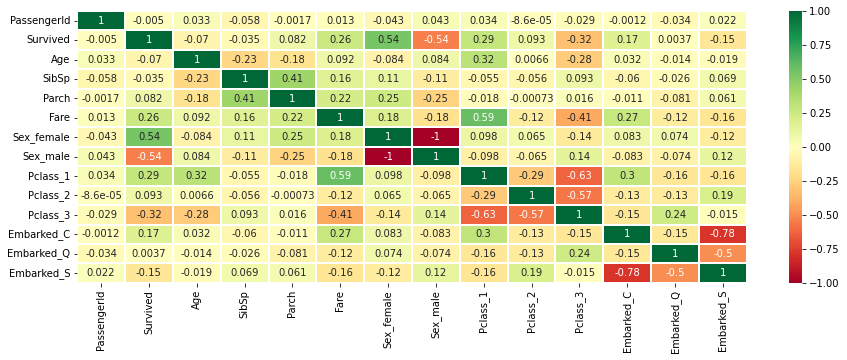

In [29]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()

# **Logistic Regression**

**Import Require Packages**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #for accuracy_score

In [31]:
# Model Preprocessing.
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']


In [32]:
#Spliting the data and set seed for random:610
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=610)

**Feature Scaling**

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Initialize our algorithm
# lg = XGBClassifier()
lg = LogisticRegression()

In [35]:
lg.fit(X_train,y_train)

LogisticRegression()

In [36]:
predictions = lg.predict(X_test)

**Check Prediction Score as well as Number of Survived and Not-Survived People**

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       224
           1       0.81      0.66      0.73       133

    accuracy                           0.82       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.82      0.81       357



In [38]:
print("accuracy",lg.score(X_test,y_test))
print("Survived", sum(predictions != 0))
print("Non-Survived", sum(predictions == 0))

accuracy 0.8151260504201681
Survived 109
Non-Survived 248


## **Confusion Matrix**

In [39]:
confusion_matrix(y_test,predictions)

array([[203,  21],
       [ 45,  88]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

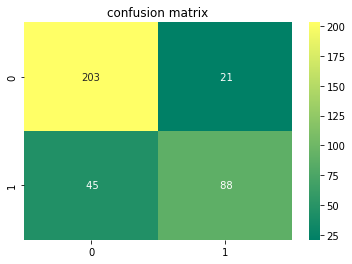

In [40]:
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('confusion matrix')

**Model Accuracy is 81.51%**

In [41]:
#from sklearn.metrics import accuracy_score #for accuracy_score
prediction_lg=lg.predict(X_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lg, y_test)*100,2))

The accuracy of the Logistic Regression is 81.51
